# 探索聚類分析(Cluster in Quest)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import time
from numpy import random

# MNIST Dataset

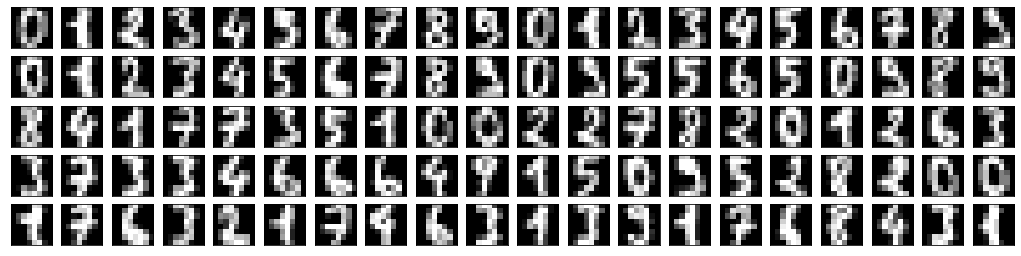

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# CLIQUE

Amount of clusters: 26


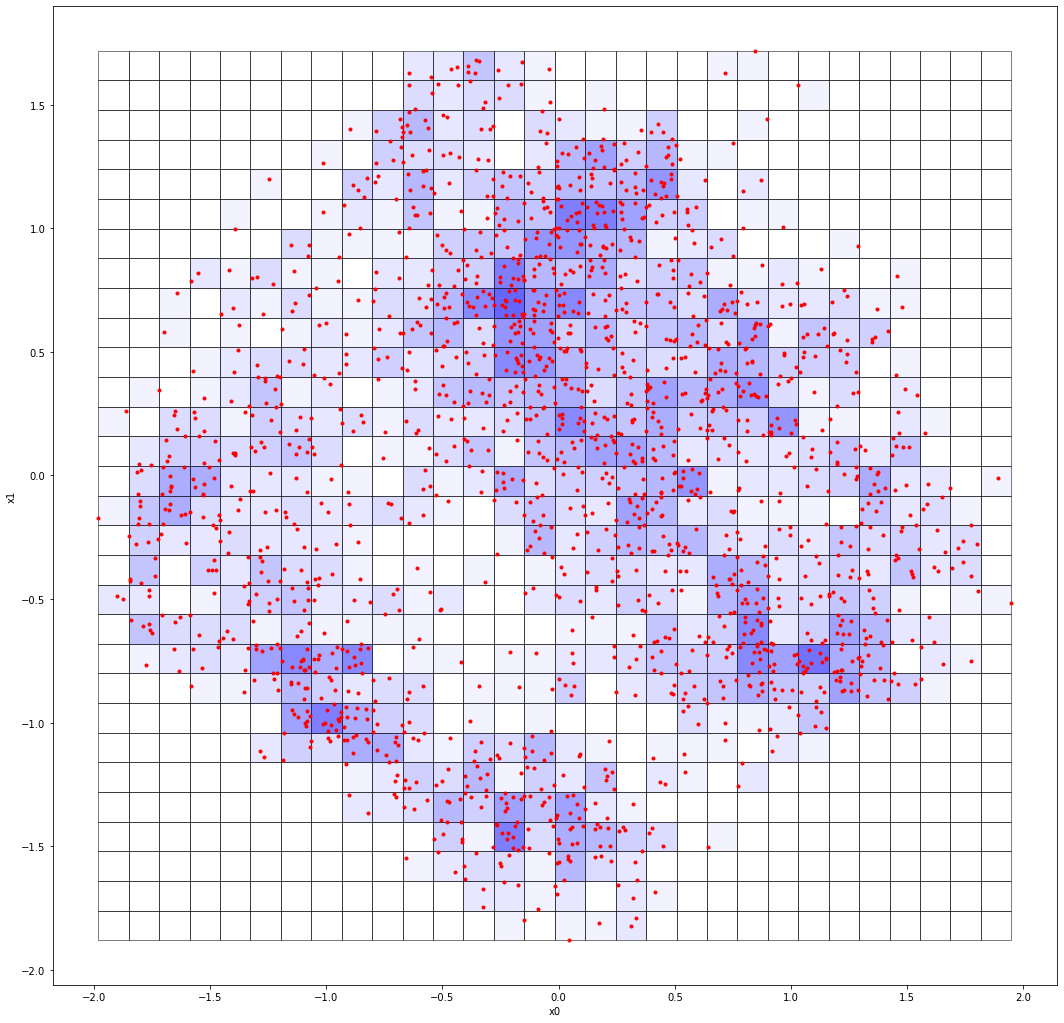

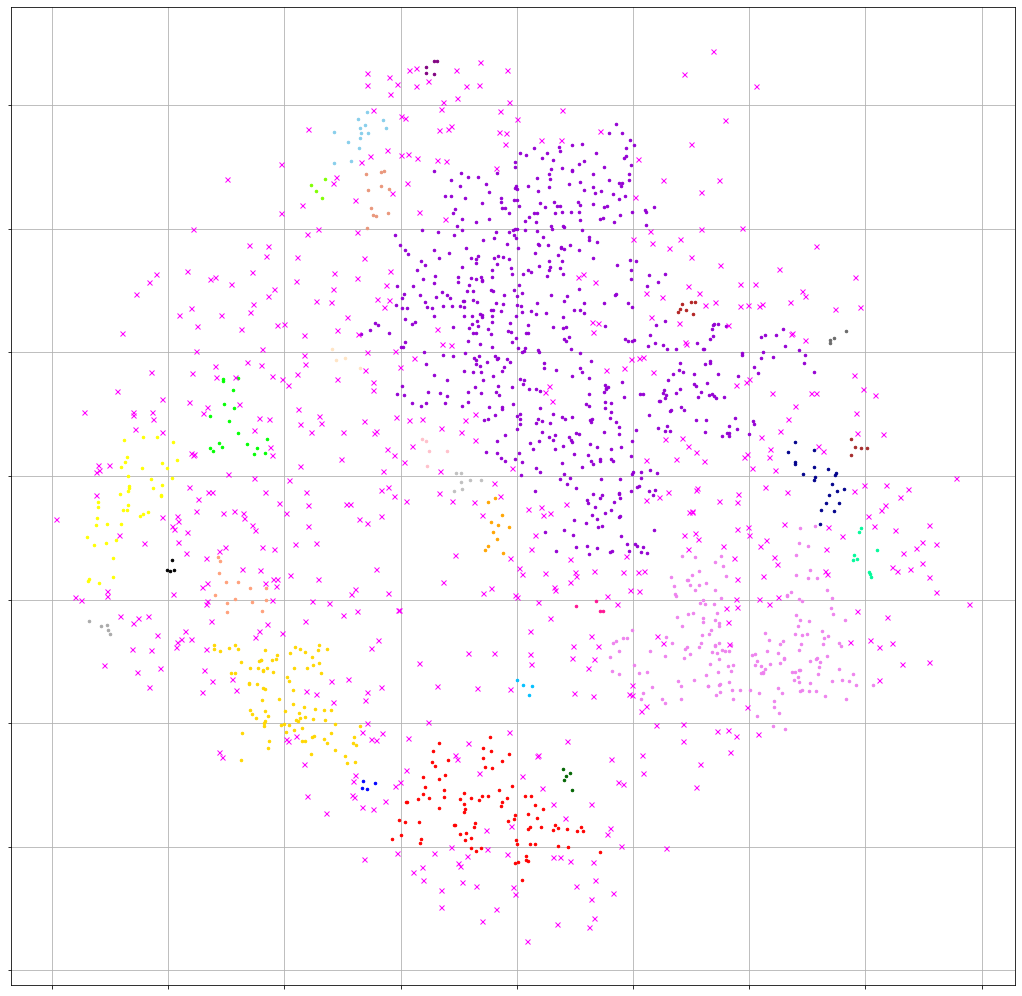

In [4]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
N=X.shape[0]
X_embedded=PCA(X,2,N)
data=[]
for i in range(N):
    data.extend([list(X_embedded[i])])
intervals = 30  
threshold = 3   
clique_instance = clique(data, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise() 
cells = clique_instance.get_cells()    
print("Amount of clusters:", len(clusters))
clique_visualizer.show_grid(cells, data)
clique_visualizer.show_clusters(data, clusters, noise)